# Parkinson’s Disease Prediction

### About The Dataset

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each 

column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals

("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column 

which is set to 0 for healthy and 1 for PD.


The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are 

around six recordings per patient, the name of the patient is identified in the first column.

Further details are contained in the following reference: Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering (to appear).

### Attribute Information:

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

# Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings

C:\Users\usama\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing The Dataset

In [2]:
df = pd.read_csv("parkinsons.csv")

# verifying it is a "dataframe" object in pandas

In [3]:
type(df)

pandas.core.frame.DataFrame

# Exploratory Data Analysis

In [4]:
df.shape

(195, 24)

# Feature of the dataset i.e Columns of Dataset

In [5]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

# Preview the dataset to understand the data

##### printing out first 5 rows of dataset

In [6]:
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


##### Gerenrate 5 sample rows or column

In [7]:
df.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
30,phon_R01_S07_1,197.076,206.896,192.055,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,...,0.01689,0.00339,26.775,0,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
12,phon_R01_S04_1,136.926,159.866,131.276,0.00293,0.00002,0.00118,0.00153,0.00355,0.01259,...,0.01968,0.00581,25.703,1,0.460600,0.646846,-6.547148,0.152813,2.041277,0.138512
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
51,phon_R01_S13_4,126.344,134.231,112.773,0.00448,0.00004,0.00131,0.00169,0.00393,0.02033,...,0.03429,0.00474,25.030,0,0.507504,0.760361,-6.689151,0.291954,2.431854,0.105993
93,phon_R01_S22_3,152.125,161.469,76.596,0.00382,0.00003,0.00191,0.00226,0.00574,0.05925,...,0.10024,0.01211,20.969,1,0.447456,0.697790,-6.152551,0.173520,2.080121,0.160809


##### getting information about the attributes and thier datatypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

##### Checking Null Values

In [9]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Statistics of Dataset

In [10]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


##### our feature of interest is target Variables i.e Status Column

In [11]:
print("Total No Of Diseases")
print(len(df.status.unique()))

Total No Of Diseases
2


In [12]:
#looking at unique values
df["status"].unique()
# 1 for Parkisons Disease
# 0 for healthy

array([1, 0], dtype=int64)

In [13]:
# frequency distribution of target variable
# number of instances (rows) that belong to each class
df.groupby("status").size()

status
0     48
1    147
dtype: int64

### analysing the target variable

In [14]:
df["status"].describe()

count    195.000000
mean       0.753846
std        0.431878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: status, dtype: float64

In [15]:
df.groupby("status").mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [16]:
df["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

##### visualizing the frequency distribution

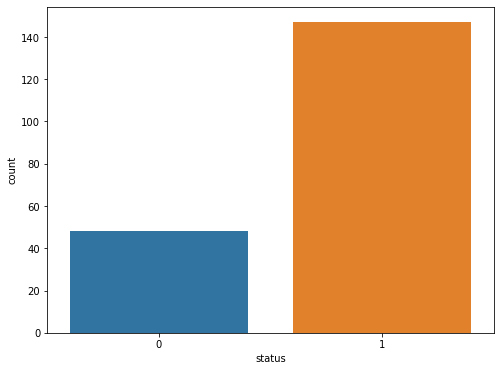

In [17]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="status", data=df)
plt.show()

# interpretation of heatmap

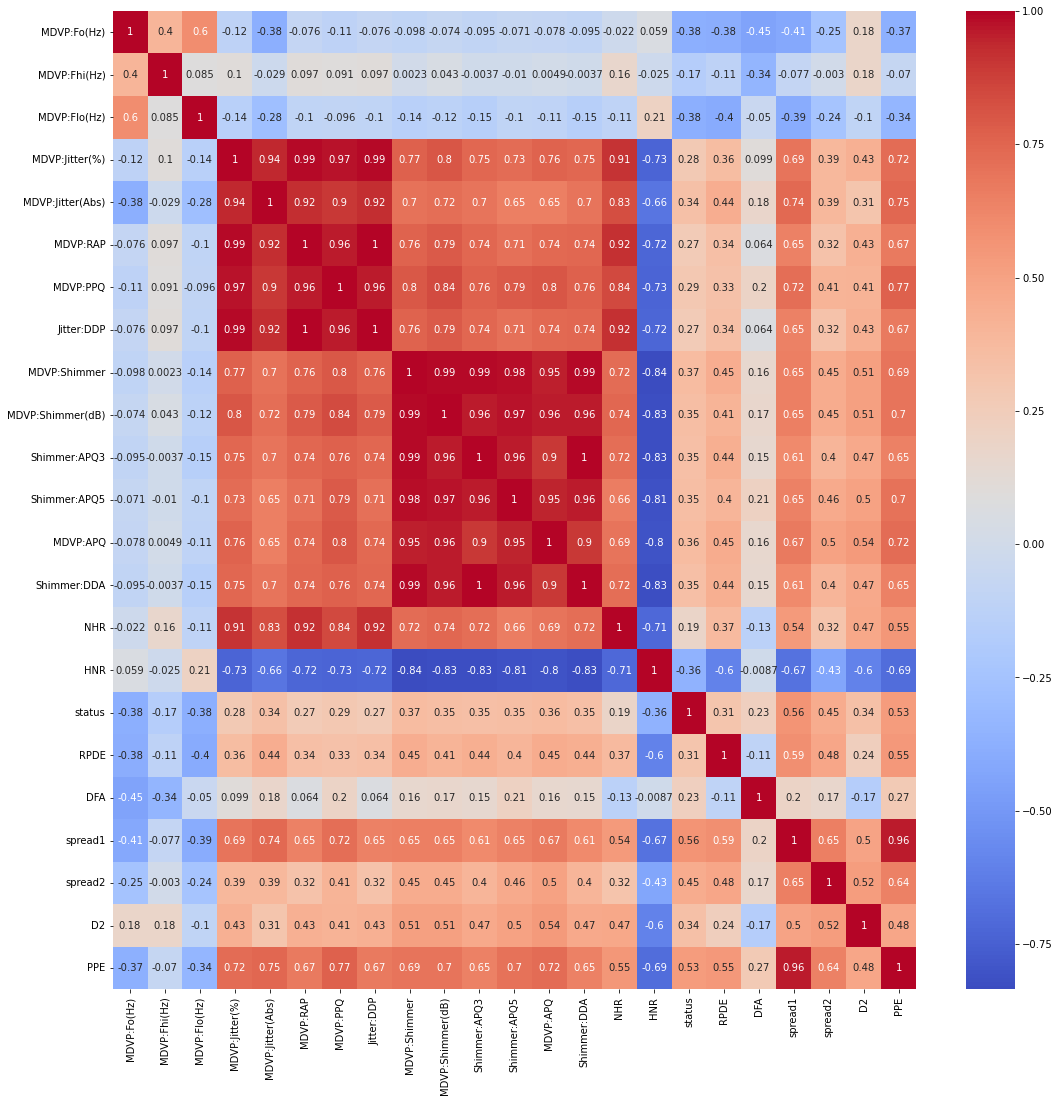

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap to show correlation between features
plt.figure(figsize=(18, 18))
sns.heatmap(df[['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']].corr(), annot=True, cmap='coolwarm')

plt.show()
   

##### since target variable have two values i.e 0 or 1,so this is a classification problem


### binary classification problem

# Data Preprocessing

## Seperating the Features and Target Variable

In [19]:
X = df.drop(columns=["status","name"], axis=1)
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [20]:
Y = df["status"]
Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X , Y , test_size=0.2,random_state=2)

In [22]:
X_train.shape

(156, 22)

In [23]:
X_test.shape

(39, 22)

In [24]:
Y_train.shape

(156,)

In [25]:
Y_test.shape

(39,)

### Summary of train test split

In [26]:
print("Shape Of X_train"+str(X_train.shape))
print("Shape Of Y_train"+str(Y_train.shape))
print("Shape Of X_test"+str(X_test.shape))
print("Shape Of Y_test"+str(Y_test.shape))

Shape Of X_train(156, 22)
Shape Of Y_train(156,)
Shape Of X_test(39, 22)
Shape Of Y_test(39,)


### We did this because their is difference in range of of features so it will become difficult for our machin learning model to predict to we will perform "Data Standardization"

# Data Standardization

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [28]:
scaler.fit(X_train)

StandardScaler()

In [29]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 0.63239631, -0.02731081, -0.87985049, ..., -0.97586547,
        -0.55160318,  0.07769494],
       [-1.05512719, -0.83337041, -0.9284778 , ...,  0.3981808 ,
        -0.61014073,  0.39291782],
       [ 0.02996187, -0.29531068, -1.12211107, ..., -0.43937044,
        -0.62849605, -0.50948408],
       ...,
       [-0.9096785 , -0.6637302 , -0.160638  , ...,  1.22001022,
        -0.47404629, -0.2159482 ],
       [-0.35977689,  0.19731822, -0.79063679, ..., -0.17896029,
        -0.47272835,  0.28181221],
       [ 1.01957066,  0.19922317, -0.61914972, ..., -0.716232  ,
         1.23632066, -0.05829386]])

# Model Building

# Logistic Regression

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc
from sklearn.metrics import accuracy_score, recall_score , f1_score,precision_score
from sklearn.model_selection import train_test_split 

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [32]:
Y_pred_lr.shape

(39,)

# To Check the accuracy

In [33]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [34]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy Score achieved using Logistic Regression is "+ str(score_lr)+"%")

The accuracy Score achieved using Logistic Regression is 82.05%


# Confusion matrix and classification report

In [35]:
print(metrics.confusion_matrix(Y_pred_lr,Y_test))
print(classification_report(Y_pred_lr,Y_test))

[[ 5  4]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.87      0.90      0.89        30

    accuracy                           0.82        39
   macro avg       0.75      0.73      0.74        39
weighted avg       0.81      0.82      0.82        39



# Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [37]:
Y_pred_nb.shape

(39,)

# Checking Accuracy Score

In [38]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy Score achieved using Naive Bayes is "+ str(score_nb)+"%")

The accuracy Score achieved using Naive Bayes is 61.54%


# Confusion matrix and classification report

In [39]:
print(metrics.confusion_matrix(Y_pred_nb,Y_test))
print(classification_report(Y_pred_nb,Y_test))

[[ 8 15]
 [ 0 16]]
              precision    recall  f1-score   support

           0       1.00      0.35      0.52        23
           1       0.52      1.00      0.68        16

    accuracy                           0.62        39
   macro avg       0.76      0.67      0.60        39
weighted avg       0.80      0.62      0.58        39



# Support Vector Machine

In [40]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train,Y_train)

Y_pred_svm = sv.predict(X_test)

In [41]:
Y_pred_svm.shape

(39,)

# Checking Accuracy Score

In [42]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy Score achieved using SVM is "+ str(score_svm)+"%")

The accuracy Score achieved using SVM is 87.18%


# Confusion matrix and classification report

In [43]:
print(metrics.confusion_matrix(Y_pred_nb,Y_test))
print(classification_report(Y_pred_nb,Y_test))

[[ 8 15]
 [ 0 16]]
              precision    recall  f1-score   support

           0       1.00      0.35      0.52        23
           1       0.52      1.00      0.68        16

    accuracy                           0.62        39
   macro avg       0.76      0.67      0.60        39
weighted avg       0.80      0.62      0.58        39



# K Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,Y_train)

Y_pred_knn = knn.predict(X_test)

In [45]:
Y_pred_knn.shape

(39,)

# Checking Accuracy Score

In [46]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy Score achieved using K Nearest Neighbors is "+ str(score_knn)+"%")

The accuracy Score achieved using K Nearest Neighbors is 87.18%


# Confusion matrix and classification report

In [47]:
print(metrics.confusion_matrix(Y_pred_knn,Y_test))
print(classification_report(Y_pred_knn,Y_test))

[[ 7  4]
 [ 1 27]]
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.87      0.96      0.92        28

    accuracy                           0.87        39
   macro avg       0.87      0.80      0.83        39
weighted avg       0.87      0.87      0.86        39



# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train,Y_train)

Y_pred_rf = rf.predict(X_test)

In [49]:
Y_pred_rf.shape

(39,)

# Checking Accuracy Score

In [50]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy Score achieved using Random Forest is "+ str(score_rf)+"%")

The accuracy Score achieved using Random Forest is 82.05%


# Confusion matrix and classification report

In [51]:
print(metrics.confusion_matrix(Y_pred_rf,Y_test))
print(classification_report(Y_pred_rf,Y_test))

[[ 6  5]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.75      0.55      0.63        11
           1       0.84      0.93      0.88        28

    accuracy                           0.82        39
   macro avg       0.79      0.74      0.76        39
weighted avg       0.81      0.82      0.81        39



# Final Score

In [52]:
scores = [score_lr,score_nb,score_svm,score_knn,score_rf]

algorithms = ["Logistic Regression","Navie Bayes","Support Vector Machine","K Nearest Neighbors","Random Forest Tress"]

for i in range(len(algorithms)):
    print("The Accuracy Score Achieved Using "+algorithms[i]+" is: "+ str(scores[i])+" %")

The Accuracy Score Achieved Using Logistic Regression is: 82.05 %
The Accuracy Score Achieved Using Navie Bayes is: 61.54 %
The Accuracy Score Achieved Using Support Vector Machine is: 87.18 %
The Accuracy Score Achieved Using K Nearest Neighbors is: 87.18 %
The Accuracy Score Achieved Using Random Forest Tress is: 82.05 %


C:\Users\usama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy Score'>

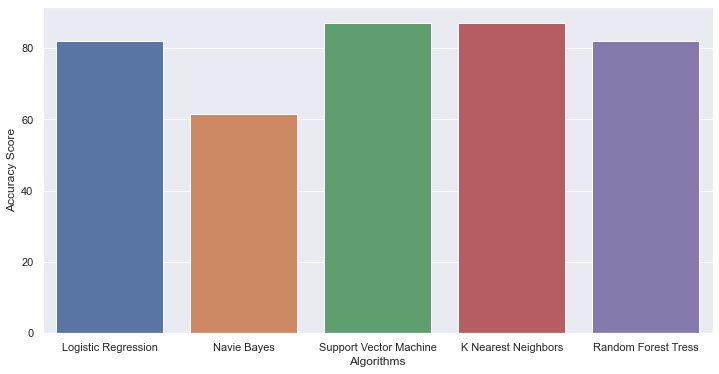

In [53]:
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")

sns.barplot(algorithms,scores)

## So From Above Comparision , it can be visualized that Support Vector Machine and K-Nearest Neighbor Gives the best Accuracy So We will check accuracy of training and testing Data

# Selecting Best Model for Our Prediction System

### accuracy on training data with K nearest neighbor

In [54]:
X_train_prediction = knn.predict(X_train)
training_data_knn_accuracy = round(accuracy_score(X_train_prediction,Y_train)*100,2)
print("The Accuracy on training Data is: "+str(training_data_knn_accuracy)+" %")

The Accuracy on training Data is: 95.51 %


### accuracy on test data with K nearest neighbor

In [55]:
X_test_prediction = knn.predict(X_test)
test_data_knn_accuracy = round(accuracy_score(X_test_prediction,Y_test)*100,2)
print("The Accuracy on test Data is: "+str(test_data_knn_accuracy)+" %")

The Accuracy on test Data is: 87.18 %


### accuracy on training data using Support Vector Machine

In [56]:
X_train_prediction = sv.predict(X_train)
training_data_svm_accuracy = round(accuracy_score(X_train_prediction,Y_train)*100,2)
print("The Accuracy on training Data is: "+str(training_data_svm_accuracy)+" %")

The Accuracy on training Data is: 88.46 %


### accuracy on test data using Support Vector Machine

In [57]:
X_test_prediction = sv.predict(X_test)
test_data_svm_accuracy = round(accuracy_score(X_test_prediction,Y_test)*100,2)
print("The Accuracy on test Data is: "+str(test_data_svm_accuracy)+" %")

The Accuracy on test Data is: 87.18 %


# Final Selection Of Model

In [58]:
train_test_accuracy_scores = [training_data_knn_accuracy,test_data_knn_accuracy,training_data_svm_accuracy,test_data_svm_accuracy]

Model = ["Training Data KNN Accuracy","Testing Data KNN Accuracy","Training Data SVM Accuracy","Testing Data SVM Accuracy"]

for i in range(len(Model)):
    print("The Accuracy Score Achieved Using "+Model[i]+" is: "+ str(train_test_accuracy_scores[i])+" %")

The Accuracy Score Achieved Using Training Data KNN Accuracy is: 95.51 %
The Accuracy Score Achieved Using Testing Data KNN Accuracy is: 87.18 %
The Accuracy Score Achieved Using Training Data SVM Accuracy is: 88.46 %
The Accuracy Score Achieved Using Testing Data SVM Accuracy is: 87.18 %


C:\Users\usama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='Accuracy Score'>

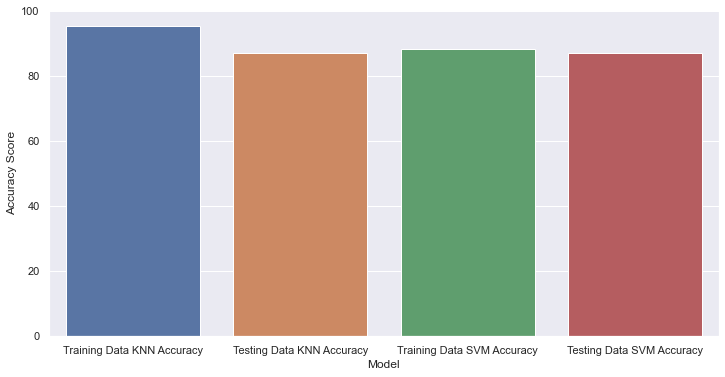

In [59]:
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Model")
plt.ylabel("Accuracy Score")

sns.barplot(Model,train_test_accuracy_scores)

# So From Above Comparision , it can beKNN model is causing overfitting, So I'm Gonna use Support Vector Machine 

#### The difference in accuracy between the training data and the testing (or validation) data is commonly referred to as "overfitting."

# Building A Predictive System

In [60]:
input_data = [107.33200,113.84000,104.31500,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.13400,0.00829,0.00946,0.01256,0.02487,0.00344,26.89200,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755]

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = sv.predict(std_data)
print(prediction)

if (prediction[0]==0):
    print("The Person does not have Parkinsons Disease")
else:
    print("The Person have Parkinsons Disease")


[[-1.22706637 -0.95024795 -0.31545926 -0.68526324 -0.40011041 -0.63545789
  -0.59687386 -0.63653302 -0.78422691 -0.79419416 -0.7662775  -0.74121479
  -0.71116895 -0.76627512 -0.54244756  1.13732763  1.31597068  0.8152888
  -0.44195938 -0.49038395 -0.82835437 -0.47791889]]
[1]
The Person have Parkinsons Disease


C:\Users\usama\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [61]:
input_data = [252.45500,261.48700,182.78600,0.00185,0.000007,0.00092,0.00113,0.00276,0.01152,0.10300,0.00614,0.00730,0.00860,0.01841,0.00432,26.80500,0.610367,0.635204,-7.319510,0.200873,2.028612,0.086398]

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = sv.predict(std_data)
print(prediction)

if (prediction[0]==0):
    print("The Person does not have Parkinsons Disease")
else:
    print("The Person have Parkinsons Disease")


[[ 2.38607133  0.68498538  1.44705046 -0.88562403 -1.02591518 -0.79752902
  -0.82988261 -0.79756092 -0.99282224 -0.94384826 -0.96733633 -0.91268712
  -0.92966477 -0.96764661 -0.52261461  1.11855094  1.06242034 -1.5781686
  -1.46372814 -0.28854226 -0.91945178 -1.30761253]]
[0]
The Person does not have Parkinsons Disease


C:\Users\usama\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Saving The Trained Model

In [62]:
import pickle

In [63]:
filename = 'Parkinsons_model.sav'
pickle.dump(sv , open(filename, 'wb'))

### Loading The save model

In [64]:
load_model = pickle.load(open('Parkinsons_model.sav','rb'))

In [65]:
for column in X.columns:
    print(column)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE
